<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/3%EC%A3%BC%EC%B0%A8/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

요구사항 분석:

*   건포도 2가지를 분류해야한다.
*   input 데이터 영역은 실수형이다.
*   결측치 확인은 해야한다.



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_excel("/content/drive/MyDrive/Raisin_Dataset.xlsx").dropna()
df  # print(df) 와 동일

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


레이블의 불균형 확인

In [22]:
df['Class'].value_counts()
#코드는 Kecimen 450, Besni 450으로 전체 900개에서 반반이 나왔다.

,count
Class,
Kecimen,450
Besni,450


그래프로 표현한 Class 레이블들에 갯

Text(0.5, 1.0, '건포도')

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: Use

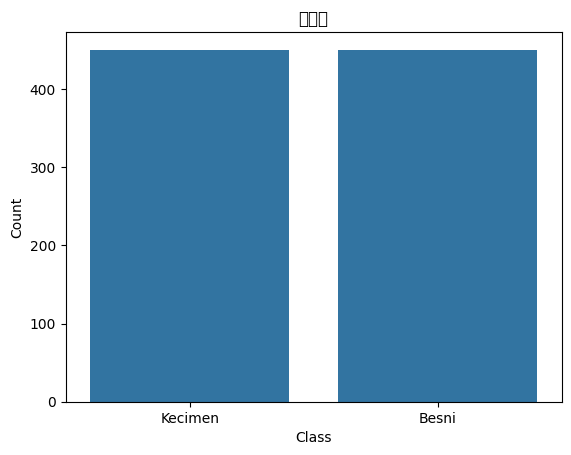

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Class")
plt.xlabel("Class")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("raisin")

다음으로 결측치를 확인합니다.

In [24]:
df.isnull().sum()
#위 코드를 통해 이번 데이터에는 결측치가 없다는것을 확인했다.

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


위 코드에 경우 결측치가 없기 때문에 문제가 없지만
df = df.dropna()
df.isnull().sum()
위 코드를 통해서 결측치가 있을 경우 행단위로 지우는 등에 행동을 해야한다.

In [25]:
df = df.dropna()
df.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


In [26]:
#컬럼명 확인
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

위 과정을 통해서 데이터 레이블간 불균형과 결측치를 확인 할 수 있습니다. 이 과정이 끝났기에 아래 부터는 분류모델을 시작합니다.

In [27]:
X=df.drop(columns=['Class'])
y=df["Class"]

In [28]:
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [29]:
y

,Class
0,Kecimen
1,Kecimen
2,Kecimen
3,Kecimen
4,Kecimen
...,...
895,Besni
896,Besni
897,Besni
898,Besni


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)

In [31]:
#각 데이터의 숫자와 컬럼수 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 7), (180, 7), (720,), (180,))

In [32]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)

In [33]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [34]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [35]:
# 정답값 출력

y_test


,Class
502,Besni
637,Besni
701,Besni
237,Kecimen
707,Besni
...,...
499,Besni
538,Besni
780,Besni
702,Besni


In [36]:

#예측값 출력

dt_y_pred

array(['Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
       'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 

In [37]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 0.8444
[[70 20]
 [ 8 82]]
=== RF Test Accuracy ===
Random Forest : 0.8667
[[71 19]
 [ 5 85]]
=== LR Test Accuracy ===
Logistic Reg. : 0.8889
[[74 16]
 [ 4 86]]
